In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
data = pd.read_csv("./set4.txt", sep = ' ', index_col=0, header=None)[1].values
data[:10]

array(['R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R'], dtype=object)

In [5]:
from collections import Counter

c = Counter(data)
c

Counter({'L': 400, 'R': 400})

Итак, имеем одинаковое число наблюдаемых.

In [13]:
from MyHMM import MyLittleHMM

In [16]:
obs_vocab = {'L': 0, 'R': 1}
numstates = 2 
iteration_num = 5

hmm = MyLittleHMM(numstates=numstates, observations_vocab=obs_vocab)
emis_list, trans_list, init_probs_list = hmm.compute_several_steps(observations=data, num_steps=iteration_num)

INITIAL:

TRANSITION MTX:
[[ 0.53539117  0.46460883]
 [ 0.33778347  0.66221653]]

EMISSION MTX:
[[ 0.65255106  0.34744894]
 [ 0.85332202  0.14667798]]

INITIAL_PROBS:
[ 0.75716752  0.24283248]




--------------->> STEP#1 <<-------------------

TRANSITION MTX:
[[ 0.63493568  0.36506432]
 [ 0.40712698  0.59287302]]

EMISSION MTX:
[[ 0.35567402  0.64432598]
 [ 0.66136469  0.33863531]]

INITIAL_PROBS:
[ 0.87862522  0.12137478]




--------------->> STEP#2 <<-------------------

TRANSITION MTX:
[[ 0.65024112  0.34975888]
 [ 0.38817254  0.61182746]]

EMISSION MTX:
[[ 0.33771309  0.66228691]
 [ 0.68065657  0.31934343]]

INITIAL_PROBS:
[ 0.92476939  0.07523061]




--------------->> STEP#3 <<-------------------

TRANSITION MTX:
[[ 0.66972997  0.33027003]
 [ 0.36410236  0.63589764]]

EMISSION MTX:
[[ 0.31553526  0.68446474]
 [ 0.70408766  0.29591234]]

INITIAL_PROBS:
[ 0.95668991  0.04331009]




--------------->> STEP#4 <<-------------------

TRANSITION MTX:
[[ 0.69452332  0.30547668]
 [ 0.33

# Emission probabilities

Вероятность испустить наблюдаемые L & R находясь в одном из скрытых состояний.

Здесь изображен график для скрытого состояния 0.

In [30]:
def plot_emission_prob(state_num):
    assert state_num < emis_list[0].shape[0]
    zero_L = [e[state_num][0] for e in emis_list]
    zero_R = [e[state_num][1] for e in emis_list]
    plt.plot(zero_L, label='L probability')
    plt.plot(zero_R, label = 'R probability')
    plt.title("Probability to emit L & R from {}-state\n dependence from iter step".format(state_num))
    plt.xlabel("Iteration step")
    plt.ylabel("Propapility")
    plt.legend()
    plt.show()

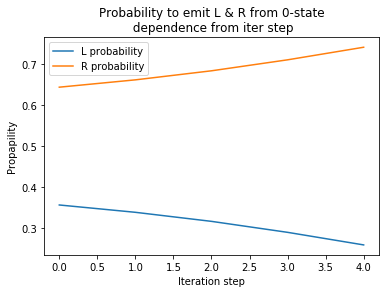

In [31]:
plot_emission_prob(0)

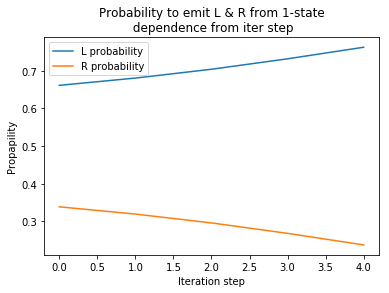

In [32]:
plot_emission_prob(1)

# Transition propabilities

Вероятность перейти из скрытого состояния i в скрытое состояние j

In [40]:
def plot_transition_prob(state_num_from):
    assert state_num_from < trans_list[0].shape[0]
    for j in range(trans_list[0].shape[0]):
        state_prob_ij = [e[state_num_from][j] for e in trans_list]
        plt.plot(state_prob_ij, label='From {} to {} prob'.format(state_num_from, j))
        
    plt.title("Probability to get into j-states from {}-state\n dependence from iter step".format(state_num_from))
    plt.xlabel("Iteration step")
    plt.ylabel("Propapility")
    plt.legend()
    plt.show()

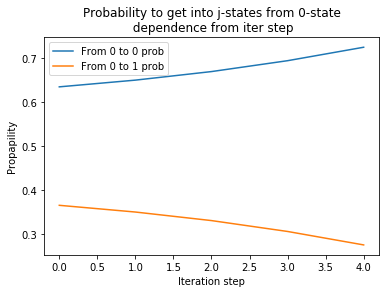

In [41]:
plot_transition_prob(0)

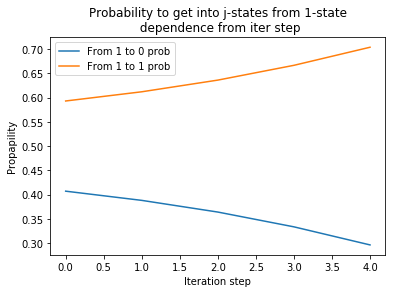

In [42]:
plot_transition_prob(1)

# Initial probabilities

Вероятность нахождения в скрытом состоянии 0 или 1 в начальный момент времени

In [43]:
init_probs_list[0]

array([ 0.87862522,  0.12137478])

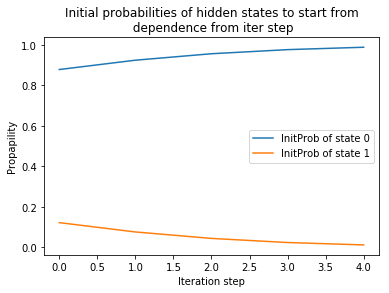

In [46]:
for i in range(len(init_probs_list[0])):
    state_prob_i = [e[i] for e in init_probs_list]
    plt.plot(state_prob_i, label='InitProb of state {}'.format(i))

plt.title("Initial probabilities of hidden states to start from\n dependence from iter step".format(i))
plt.xlabel("Iteration step")
plt.ylabel("Propapility")
plt.legend()
plt.show()

# Вывод

Полученные распределения вероятностей согласуются с исходными данными.

Initial probability для скрытого состояния 0 стремится к 1, что соответствует начальному наблюдаемому R, вероятность испускания которого также высокая именно из состояния 0.